# Binary Systems Diagrams

Phase diagrams of binary mixtures are extremely important to understand the 
phase behaviour of mixtures, make predictions and evaluate models.

In `yaeos` the `GPEC` algorithm has been partially implemented. This algorithm
allows the efficient calculation of phase diagrams for binary mixtures.

> Warning: This implementation is still a working in progress and due to 
> several changes in the future. Revisions and opinions are also welcomed!

In [1]:
import yaeos
import matplotlib.pyplot as plt
import numpy as np

## Global Phase Equilibria Diagram (GPED)

In `yaeos` the $GPED$ of a binary mixture is easy to generate. First, we define
the model (EoS) that we want to use. Once the model is defined we use the
object `GPEC` that receives as argument the defined model.

First we define the mixture that we are going to study, we will use the 
binary mixture of $CO_2$ and $nC_4$.

In [2]:
# Pure compounds properties
Tc = np.array([304.2, 425.1])      # critical temperature of CO2 and n-butane [K]
Pc = np.array([73.8, 38.0])        # critical pressure of CO2 and n-butane [bar]
w =  np.array([0.2236, 0.200164])  # acentric factor of CO2 and n-butane [-]

Once we have defined our system, we define the model to use. For this case
we will use the PengRobinson78 Equation of State, with the classical quadratic
mixing rules using a constant $k_{ij}=0.1$ and $l_{ij}=0$

In [3]:
kij = np.zeros((2, 2))       # binary interaction parameter matrix
kij[0, 1] = kij[1, 0] = 0.1  # CO2-n-butane


mixrule = yaeos.QMR(kij=kij, lij=0*kij)

model = yaeos.PengRobinson78(Tc, Pc, w, mixrule)

Once we have everything defined. We just instantiate a `GPEC` object like 
follows.

In [4]:
gpec = yaeos.GPEC(model)

### Plotting diagrams
We can now plot the different kind of phase diagrams calculated for a 
binary mixture. Starting with the global phase equilibrium diagram, we use
the method `plot_gped`.

Here we can see how to do it, and the resulting diagram, where it is possible
to see the vapor pressure lines for each pure component and two critical lines.
One corresponding to the LV equilibrium line, that goes from one pure component
critical point to the other and a LL equilibrium line. This second line starts
from high pressure and ends at a lower critical end point.

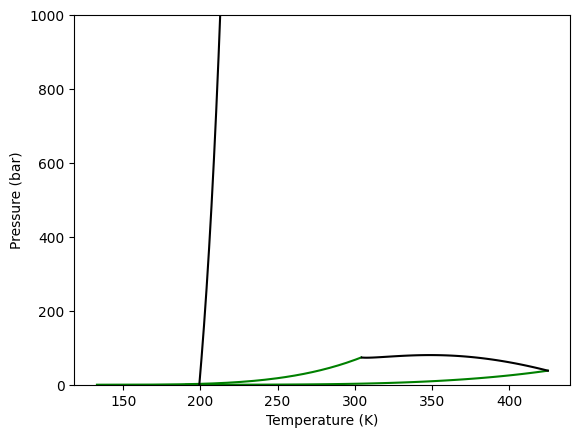

In [ ]:
gpec.plot_gped()

plt.ylim(0, 100)
plt.show()

### Plotting isotherms (Pxy diagrams)
It is also possible to calculate $Pxy$ diagrams, just specifying the temperature.
This is done with the `plot_pxy` method, which plots the phase diagram and
outputs the calculated values too.

(0.0, 1.0)

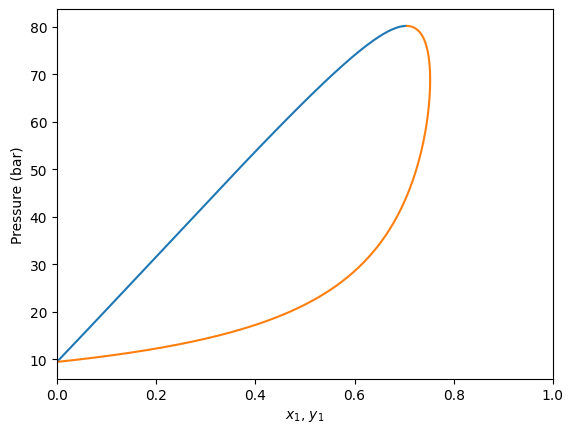

In [12]:
gpec.plot_pxy(temperature=350)

plt.xlim(0, 1)

### Pxy regions with LL equilibria

The GPEC algorithm will detect if the Liquid-Liquid critical line exists at the specified temperature and will calculate the corresponding LL region.

(0.0, 1.0)

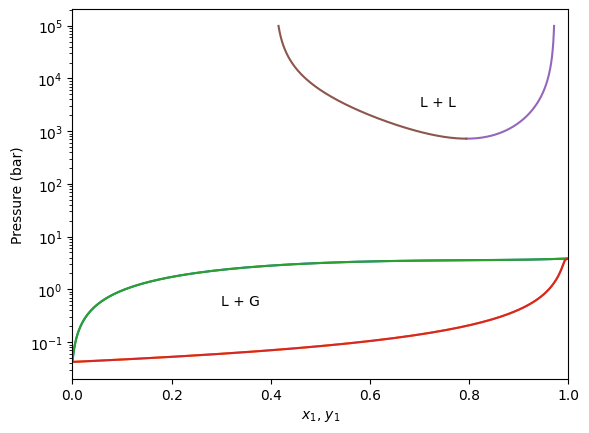

In [ ]:
gpec.plot_pxy(temperature=210)
plt.yscale('log')

plt.annotate("L + G", xy=(0.2, 0.5), xytext=(0.3, 0.5))
plt.annotate("L + L", xy=(0.7, 3000), xytext=(0.7, 3000))
plt.xlim(0, 1)
plt.show()

### Plot isobaric (Txy) diagrams

It is also possible to calculate isobaric diagrams. This is done in a similar
way that isothermic ones, but in this case we use the `plot_txy` method. This
method receives the specified pressure for this.

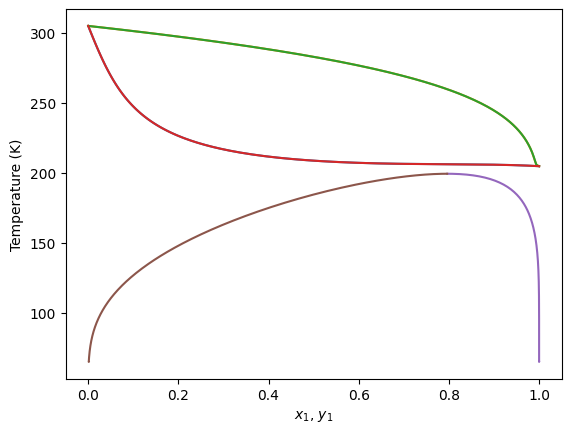

In [7]:
gpec.plot_txy(pressure=3.0)